# Airline Passenger Satisfaction Analysis
<img src="images/aviation.jpeg" style="width:600px;height:400px"/>

## I. Overview
This project uses exploratory data analysis and 7 classification modelings to predict airline passenger satisfaction after the flight journey. The data contains various survey ratings regarding different customer classes and travel types. Airlines can use my model to better understand the critical features that strongly impact satisfaction.

## II. Business Problem
Working for a US airline, my job is to create the best classification model to predict whether customers will be satisfied after flight journey and provide recommendations for stakeholders to better understand the critical features that have stronger impact on satisfaction and determine features can be improved for targeting towards specific groups.

***
### Question to Consider:
<b>Q1</b>. What is the satisfaction and dissatisfaction rate?
<br><b>Q2</b>. What are the critical features that have stronger impact on satisfaction rate?</br>
<br><b>Q3</b>. Which class has the highest dissatisfaction rate?</br>
<br><b>Q4</b>. Which flight haul has the highest dissatisfaction rate?</br>
<br><b>Q5</b>. Which age group has the highest dissatisfaction rate?</br>

## Note :)
- I will use an older sklearn version of 0.23.1 in order to import the <b>eli5</b> in later analysis
- To avoid re-start over, please set the kernel which has an older sklearn version 

In [1]:
import sklearn
sklearn.__version__

'0.23.1'

## III. Data Understanding
The datasets acquired from [Kaggle](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction) contain train and test sets. Both datasets contain customers' satisfaction (target variable) and various survey ratings regarding different customer classes and travel types.

In [2]:
import pandas as pd
pd.options.display.max_columns = 25
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('data/train.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_train.shape)
display(df_train.head())
display(df_train.info())

(103904, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
id                                   103904 non-null int64
Gender                               103904 non-null object
Customer Type                        103904 non-null object
Age                                  103904 non-null int64
Type of Travel                       103904 non-null object
Class                                103904 non-null object
Flight Distance                      103904 non-null int64
Inflight wifi service                103904 non-null int64
Departure/Arrival time convenient    103904 non-null int64
Ease of Online booking               103904 non-null int64
Gate location                        103904 non-null int64
Food and drink                       103904 non-null int64
Online boarding                      103904 non-null int64
Seat comfort                         103904 non-null int64
Inflight entertainment               103904 non-null int64


None

In [4]:
df_test = pd.read_csv('data/test.csv', index_col=0) # Treat the "Unnamed: 0" as the index column
display(df_test.shape)
display(df_test.head())
display(df_test.info())

(25976, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25976 entries, 0 to 25975
Data columns (total 24 columns):
id                                   25976 non-null int64
Gender                               25976 non-null object
Customer Type                        25976 non-null object
Age                                  25976 non-null int64
Type of Travel                       25976 non-null object
Class                                25976 non-null object
Flight Distance                      25976 non-null int64
Inflight wifi service                25976 non-null int64
Departure/Arrival time convenient    25976 non-null int64
Ease of Online booking               25976 non-null int64
Gate location                        25976 non-null int64
Food and drink                       25976 non-null int64
Online boarding                      25976 non-null int64
Seat comfort                         25976 non-null int64
Inflight entertainment               25976 non-null int64
On-board service 

None

In [5]:
total_rows = df_train.shape[0] + df_test.shape[0]
test_df_size = df_test.shape[0] / total_rows
print(test_df_size)

0.2


### Note
- The datasets were split into 80/20. For machine learning purposes, some patterns can be only learned at a specific part of the dataset. So, I will combine those two datasets.

### Combine data

In [6]:
df = pd.concat([df_train, df_test]).reset_index(drop=True)
display(df.shape)
display(df.head())
display(df.info())

(129880, 24)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
id                                   129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Inflight wifi service                129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Ease of Online booking               129880 non-null int64
Gate location                        129880 non-null int64
Food and drink                       129880 non-null int64
Online boarding                      129880 non-null int64
Seat comfort                         129880 non-null int64
Inflight entertainment               129880 non-null int64


None

### Description for each columns' abbreviation
- <b>Gender</b> - Gender of the passengers (Female, Male)
- <b>Customer Type</b> - The customer type (Loyal customer, disloyal customer)
- <b>Age</b> - The actual age of the passengers
- <b>Type of Travel</b>: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- <b>Class</b> - Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- <b>Flight distance</b> - The flight distance of this journey
- <b>Inflight wifi service</b> - Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- <b>Departure/Arrival time convenient</b> - Satisfaction level of Departure/Arrival time convenient
- <b>Ease of Online booking</b> - Satisfaction level of online booking
- <b>Gate location</b> - Satisfaction level of Gate location
- <b>Food and drink</b> - Satisfaction level of Food and drink
- <b>Online boarding</b> - Satisfaction level of online boarding
- <b>Seat comfort</b> - Satisfaction level of Seat comfort
- <b>Inflight entertainment</b> - Satisfaction level of inflight entertainment
- <b>On-board service</b> - Satisfaction level of On-board service
- <b>Leg room service</b> - Satisfaction level of Leg room service
- <b>Baggage handling</b> - Satisfaction level of baggage handling
- <b>Check-in service</b> - Satisfaction level of Check-in service
- <b>Inflight service</b> - Satisfaction level of inflight service
- <b>Cleanliness</b> - Satisfaction level of Cleanliness
- <b>Departure Delay in Minutes</b> - Minutes delayed when departure
- <b>Arrival Delay in Minutes</b> - Minutes delayed when Arrival
- <b>Satisfaction</b> - Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Check for the null values

In [7]:
df.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

>**Comment:** 
- No need to worried about duplicates (same customers can take multiple journey at different time)
- 3 types of predictors


- <b>a) Categorical Columns: </b>
    - `Gender`, `Customer Type`, `Type of Travel`, and `Class` are either binary or ternary columns


- <b>b) Numeric Columns: </b>
    - `Age`, `Flight Distance`, `Departure Dalay in Minutes`, and `Arrival Delay in Minutes` are continuous numeric columns


- <b>c) Survey Columns: </b>
    - From `Inflight wifi service` ... to ... `Cleanliness` are columns contain values from 0 to 5 (0:not applicable; 1 to 5 scale)

    - Only `Arrival Delay in Minutes` contains null value 

### Target Variable - `satisfaction`
- Check imbalance

In [8]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.565537
satisfied                  0.434463
Name: satisfaction, dtype: float64

- Binary classifiers 
- Around 57% to 43%. The data is quite balance
- Change to binary indicator

#### Note: some explanation in further content
- When I use the phrase "dissatisfied" or "dissatisfaction" it doesn't necessarily mean only dissatisfied customers. Instead, it represents both neutral and dissatisfied customers.

##  Q1. What is the satisfaction and dissatisfaction rate?
- 57% to 43%

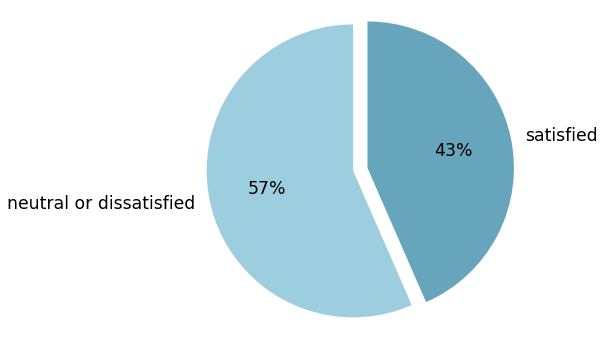

In [9]:
dissatisfied_rate = (df['satisfaction'].value_counts(normalize=True)*100)[0]  # 57%
satisfied_rate = (df['satisfaction'].value_counts(normalize=True)*100)[1]     # 43%

# Size of the pie fraction
sizes = [dissatisfied_rate, satisfied_rate]

# Label for each fraction
labels = ['neutral or dissatisfied', 'satisfied']

# Color for each fraction
colors = ['#9dcedf', '#66a5bb']

# Part of the fraction to explode
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(6,6))

# Create a pie chart
ax.pie(x=sizes, 
       labels=labels, 
       explode=explode,
       colors=colors, 
       autopct='%1.0f%%',
       shadow=False, 
       startangle=90, 
       textprops={'size':'xx-large'})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.\

plt.savefig("./images/satisfaction pie.png", dpi=300, bbox_inches='tight')
plt.show()

### Predictor

#### a) Categorical Columns

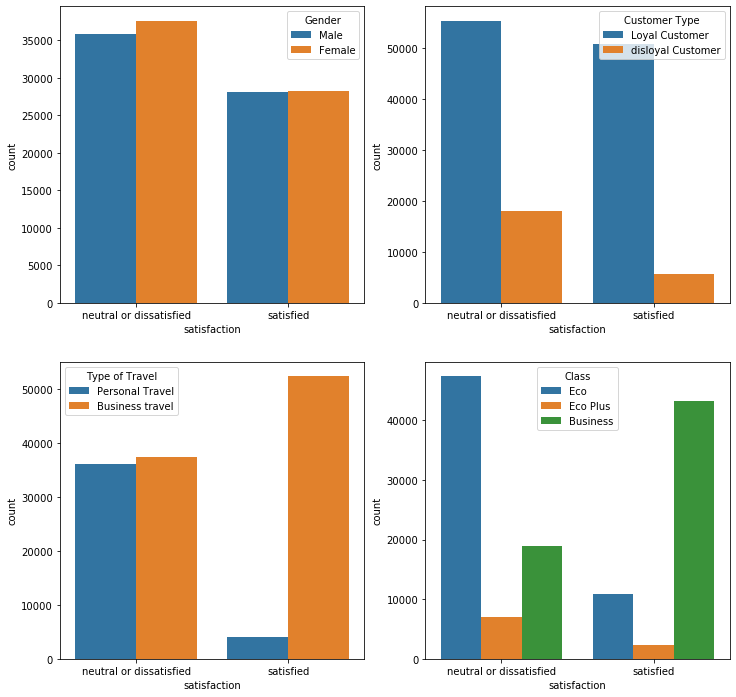

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(12,12))

# Gender
sns.countplot(data=df, x='satisfaction', hue='Gender', ax=axes[0,0])

# Customer Type
sns.countplot(data=df, x='satisfaction', hue='Customer Type', ax=axes[0,1])

# Type of Travel
sns.countplot(data=df, x='satisfaction', hue='Type of Travel', ax=axes[1,0])

# Class
sns.countplot(data=df, x='satisfaction', hue='Class', hue_order=['Eco', 'Eco Plus', 'Business'], ax=axes[1,1])

plt.show()

>**Comment:**
- `Gender` 
    - Gender distribution of satisfied and dissatisfied are quite same
    - No obvious information expression (Drop this column later)


- `Customer Type`
    - More Loyal customers (take repeat flights) than Disloyal customers(take once only)
    - More dissatisfied loyal customers than satisfied loyal customers


- `Type of Travel`
    - Similar dissatisfied for both Persoanl and Business travel customers
    - More satisfied customers in Business Travel


- `Class`
    - Eco Plus only counts for a small percent compare with Eco and Business Class
    - More dissatisfied customers in both Eco and Eco Plus
    - More satisfied customers in Business Class

#### b) Numeric Columns

In [11]:
num_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df[num_cols].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,14.713713,15.091129
std,15.119360,997.452477,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


>**Comment:** 
- `Departure Delay in Minutes` and `Arrival Delay in Minutes` can be combined and changed into a binary columns (Status)
- Departure late doesn't mean it will cause necessarily arrival late
    - How late is late? 
    - If departure delay + arrival delay is less than or equal to 20 minues, then consider the Status doesn't qualify for a  significant delay (with tolerance)

In [12]:
print("Null value percentage:", round(df['Arrival Delay in Minutes'].isna().mean()*100, 3), "%")

Null value percentage: 0.303 %


>**Comment:** Null value only account for 0.303%, which can be dropped later

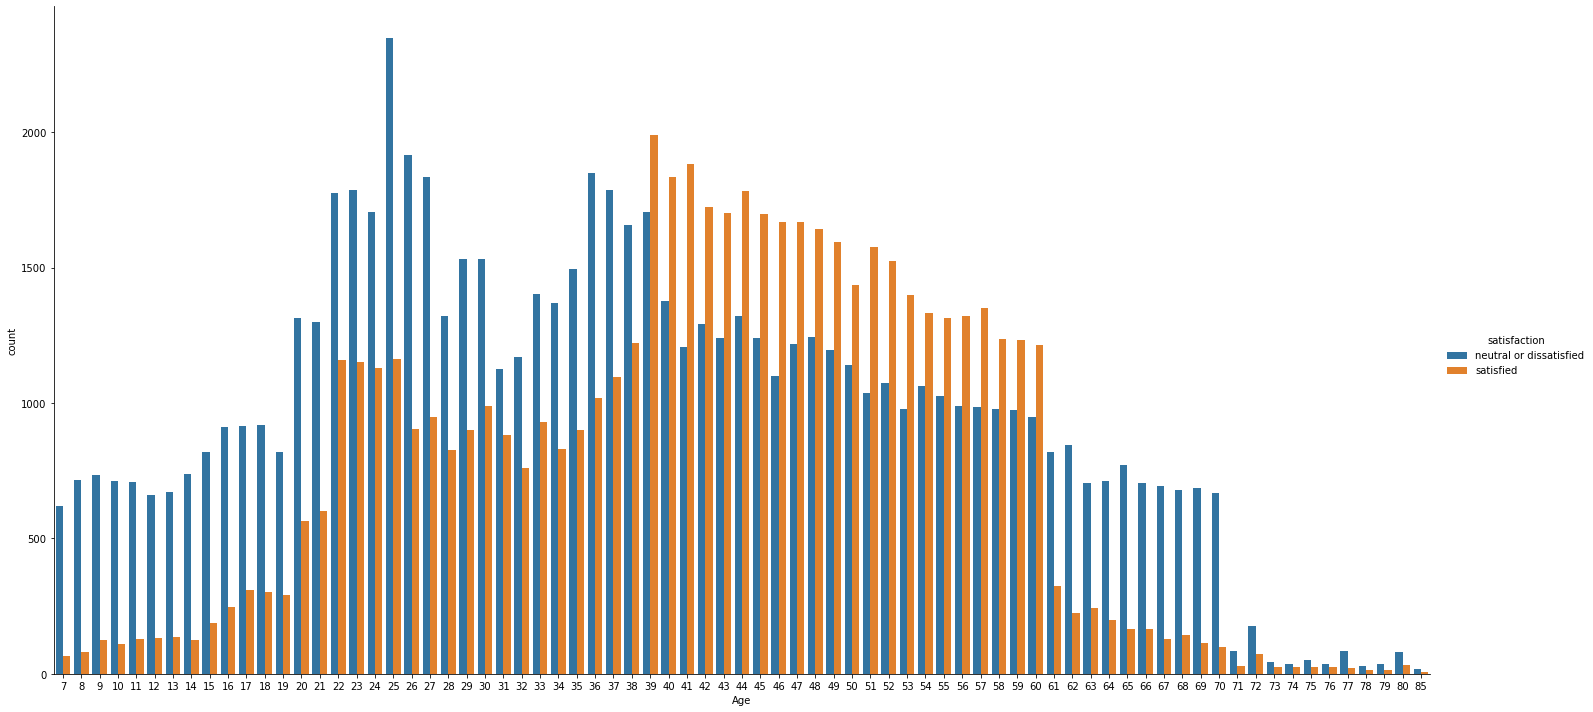

In [13]:
# Plot the age distribution and satisfaction rate
sns.catplot(data=df, x='Age', kind='count', hue='satisfaction', size=10, aspect=2);

>**Comment:**
- More satisfied than dissatisfied customers between 40 and 60
- Less customers above 70
- Separate into different age groups for further analysis

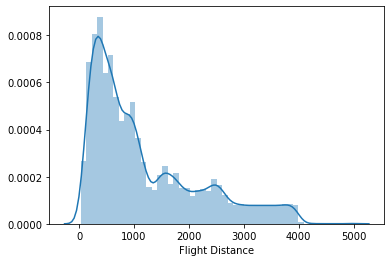

In [14]:
# Plot the flight distance distribution
sns.distplot(df['Flight Distance'])
plt.show()

>**Comment:** Change [flight distance](https://en.wikipedia.org/wiki/Flight_length#:~:text=Route%20category%20lengths%20tend%20to,haul%20as%20being%20in%2Dbetween) to short, medium and long haul

#### c) Survey Columns

In [15]:
# Want to slice the survey columns only
for ind, col in enumerate(df.columns):
    print(ind, col)

0 id
1 Gender
2 Customer Type
3 Age
4 Type of Travel
5 Class
6 Flight Distance
7 Inflight wifi service
8 Departure/Arrival time convenient
9 Ease of Online booking
10 Gate location
11 Food and drink
12 Online boarding
13 Seat comfort
14 Inflight entertainment
15 On-board service
16 Leg room service
17 Baggage handling
18 Checkin service
19 Inflight service
20 Cleanliness
21 Departure Delay in Minutes
22 Arrival Delay in Minutes
23 satisfaction


>**Comment:** Column 7 to column 20 are the survey columns

In [16]:
survey_cols = df.columns[7:21] # This survey_cols is very useful and will also be used in later analysis
df[survey_cols].describe()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326
std,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


>**Comment:** Most survey columns have an average rating of 3

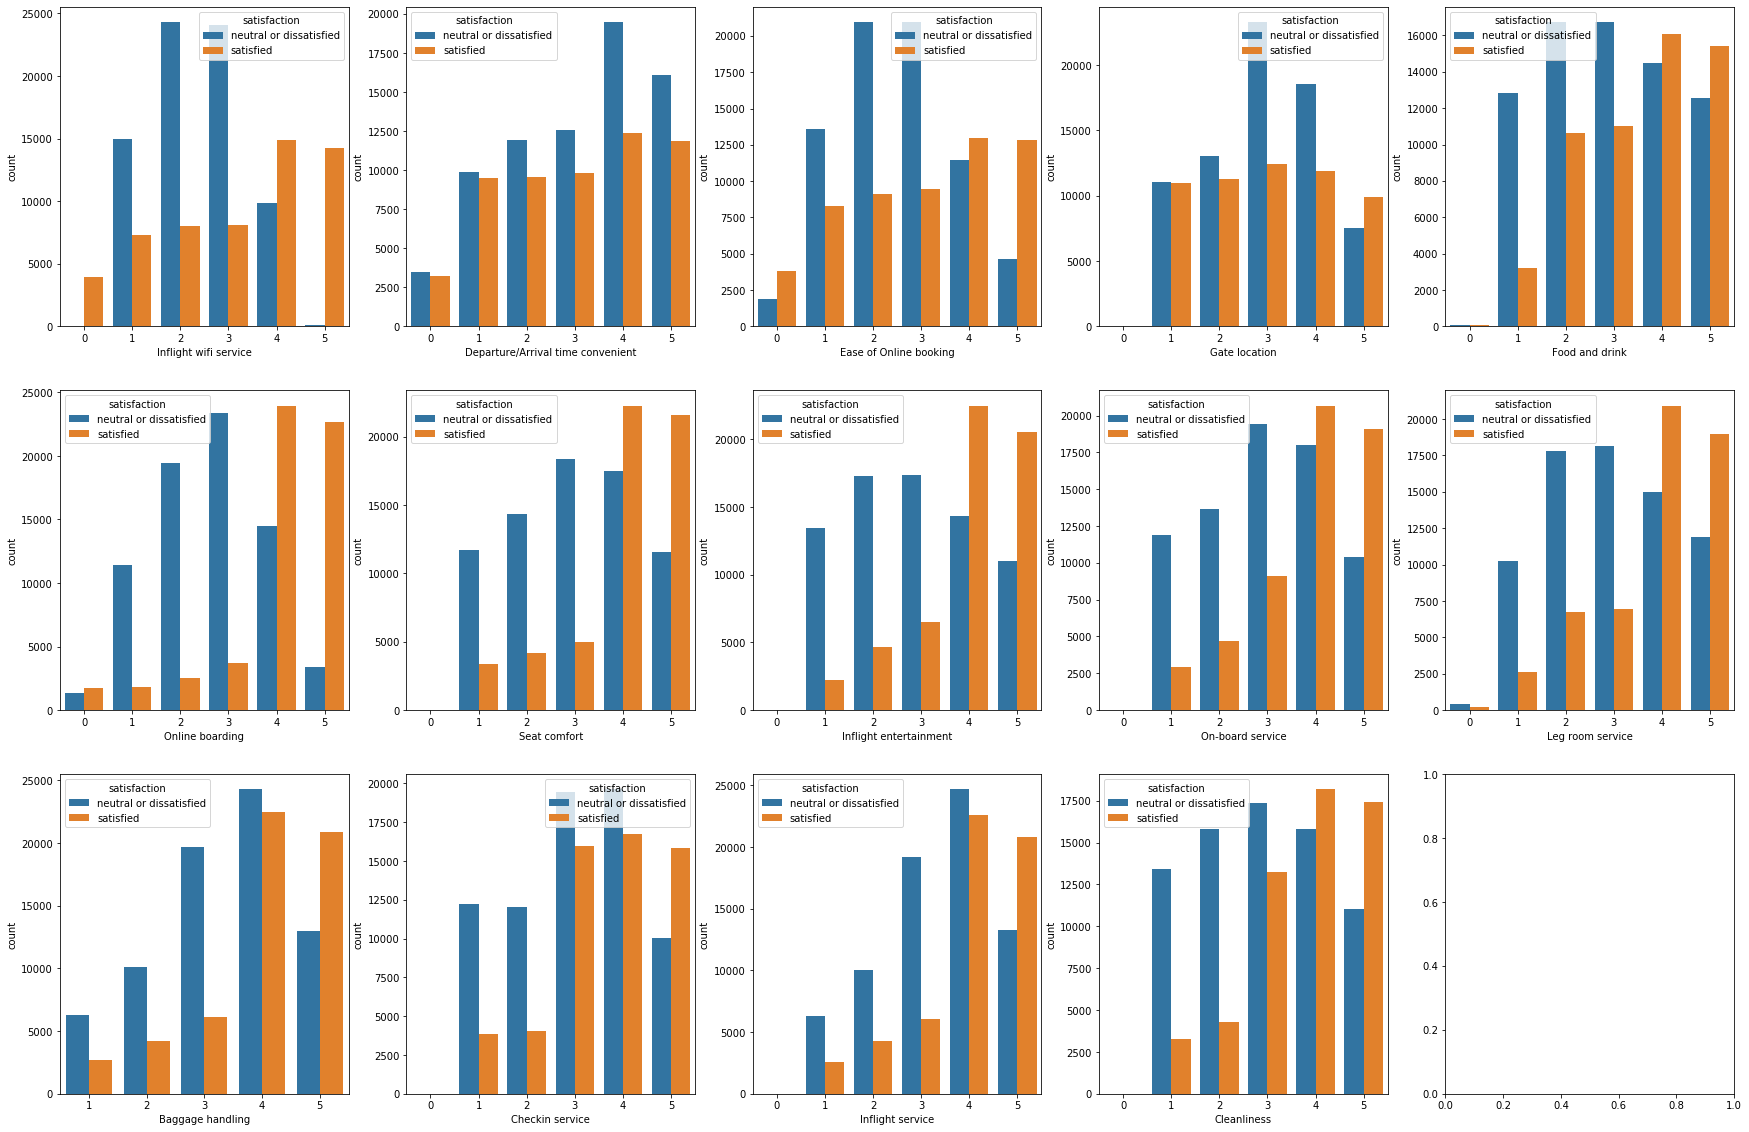

In [17]:
# Plot the each survey rating with satisfaction rate
fig, ax = plt.subplots(3, 5, figsize=(30, 20))

for variable, subplot in zip(survey_cols, ax.flatten()):
    sns.countplot(df[variable],hue=df['satisfaction'], ax=subplot)

>**Comment:**
- For most survey columns, passengers who gave a 4 or 5 are more likely to be satisfied
- Customers who gave 5s do not necessary mean they will be satisfied for the overall
- Customers who gave 3s do not necessary mean they will be dissatisfied for the overall
- Everyone has their own metic. Some people has relatively higher standard and some people have relatively lower standard
- Impractical to satisfy everyone. But it's possible to increase more satisfied customers

### *Columns need to be cleaned*

#### Target Column
- Change to binary indicator (0 or 1)

#### a) Categorical Columns
- Drop the `id` and `Gender` columns

#### b) Numeric Columns
- `Age` split into different age groups
- `Flight Distance` change to a ternary column
- `Arrival Delay in Minutes` drop the null values
- Combine `Departure Delay in Minutes` and `Arrival Delay in Minutes`.
    - Change to a binary column: Status, with either on time( <= 20 minutes) or delay ( > 20 minutes)

## IV. Data Preparation

In [18]:
data = df.copy()

### Target Column Cleaning
- `satisfaction` changed to 0 or 1

In [19]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


### a) Categorical Columns Cleaning
- Drop the `id` and `Gender` columns

In [20]:
data.drop(columns=['id', 'Gender'], inplace=True)
data.columns

Index(['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### b) Numerical Columns Cleaning
#### `Age`
- Divide into four [age groups](https://integrisok.com/resources/on-your-health/2015/october/stages-of-life-health-for-every-age)
- Young: < 20
- Adult: 20 ~ 40
- Middle: 40 ~ 60
- Senior: > 60

In [21]:
stage = []

for age in data['Age']:
    # Age less than 20
    if age < 20:
        stage.append("Young")
    
    # Age between 20 and 40
    elif age >= 20 and age < 40:
        stage.append("Adult")
    
    # Age between 40 and 60
    elif age >=40 and age < 60:
        stage.append("Middle")
    
    # Age greater than 60
    else:
        stage.append("Senior")

data['Age'] = stage

In [22]:
# Preview
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Young,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,disloyal Customer,Adult,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Loyal Customer,Adult,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Loyal Customer,Adult,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Loyal Customer,Senior,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


#### `Flight Distance`
- (Assume the distance unit: mile) convert [mile to km](https://www.google.com/search?q=1mile+to+km&rlz=1C5CHFA_enUS918US918&oq=1mile+to+km&aqs=chrome..69i57j6j0l2.4390j0j7&sourceid=chrome&ie=UTF-8)
    - 1 mile = 1.609 km
- Change the column to a ternary column based on [distance](https://en.wikipedia.org/wiki/Flight_length#:~:text=Route%20category%20lengths%20tend%20to,haul%20as%20being%20in%2Dbetween)
    - <b>short</b>: < 1500 km
    - <b>medium</b>: 1500 km ~ 4100 km
    - <b>long</b>: > 4100 km

In [23]:
# 1 mile = 1.609 km
data['Flight Distance'] = data['Flight Distance']*1.609

In [24]:
haul = []

for distance in data['Flight Distance']:
    # short haul less than 1500 km
    if distance <= 1500:
        haul.append("short")
    
    # long haul greater than 4100 km
    elif distance >= 4100:
        haul.append("long")
    
    # medium haul between 1500 and 4100 km    
    else:
        haul.append("medium")

data['Flight Distance'] = haul

In [25]:
# Preview
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Young,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,disloyal Customer,Adult,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Loyal Customer,Adult,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Loyal Customer,Adult,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Loyal Customer,Senior,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


#### `Arrival Delay in Minutes`
- Drop the null values

In [26]:
# Total of null values
df['Arrival Delay in Minutes'].isna().sum()

393

In [27]:
# Total rows - Total of null values
df.shape[0] - df['Arrival Delay in Minutes'].isna().sum()

129487

In [28]:
data = data.dropna(axis=0)

In [29]:
# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
Customer Type                        129487 non-null object
Age                                  129487 non-null object
Type of Travel                       129487 non-null object
Class                                129487 non-null object
Flight Distance                      129487 non-null object
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-board service                     129487 non-null int64
Leg room service                     129487 non-null int64

#### `Status`
- Combine the `Departure Delay in Minutes` and `Arrival Delay in Minutes` into a new column: `Status`
- If the total delay is less or equal to 20 minutes, then consider on time. Otherwise, delay

In [30]:
data['Status'] = data['Departure Delay in Minutes'] + data['Arrival Delay in Minutes']
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Status
0,Loyal Customer,Young,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,43.0
1,disloyal Customer,Adult,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,7.0
2,Loyal Customer,Adult,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0.0
3,Loyal Customer,Adult,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,20.0
4,Loyal Customer,Senior,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0.0


In [31]:
status = []

for time in data['Status']:
    # If total delay add up less than or equal to  20 minutes
    if time <= 20:
        status.append("On time")
    
    # If total delay add up greater than 20 minutes
    else:
        status.append("Delay")

data['Status'] = status

In [32]:
# Preivew
data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Status
0,Loyal Customer,Young,Personal Travel,Eco Plus,short,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,Delay
1,disloyal Customer,Adult,Business travel,Business,short,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,On time
2,Loyal Customer,Adult,Business travel,Business,medium,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,On time
3,Loyal Customer,Adult,Business travel,Business,short,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,On time
4,Loyal Customer,Senior,Business travel,Business,short,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,On time


In [33]:
# Drop the Departure Delay and Arrival Delay
data.drop(columns=['Departure Delay in Minutes', 'Arrival Delay in Minutes'], inplace=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 21 columns):
Customer Type                        129487 non-null object
Age                                  129487 non-null object
Type of Travel                       129487 non-null object
Class                                129487 non-null object
Flight Distance                      129487 non-null object
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-board service                     129487 non-null int64
Leg room service                     129487 non-null int64

In [35]:
# Save the cleaned data
data.to_csv('./data/clean_APS.csv')

## V. Modeling
- Use different classifiers to find the best model which can produce the highest test accuracy
- All classifiers will use the default parameters

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

### Evaluation Function
- An evalution function was pre-written in *eva_f.py* file

In [38]:
import eva_f as ef

### Note:
- <b>Accuracy</b>
    - Fraction of correct model prediction
    - Higher the fraction, higher the accuracy
- <b>F1-score</b>
    - Harmonic mean of precision and recall
    - Higher F1-score (close to 1) means the model has less false positives and false negatives
- <b>ROC-AUC score</b>
    - How much the model is capable to distinguish between classes
    - Higher ROC-AUC score (close to 1), better the model distinguish between classes
- <b>Confusion Matrix</b>
    - Shows the number of true positive(1,1), true negative(0,0), false positives(0,1) and false negtives(1,0)
- <b>ROC curve</b>
    - Plot true positve rate vs false positive rate

### Train Test Split

In [39]:
X = data.drop(columns=['satisfaction'], axis=1)
y = data['satisfaction']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

### Seperate predictor columns based on data type

In [40]:
# Separate in to numeric and categorical based on data type
cat_cols = []
num_cols = []

for col in X.columns:
    # Put object type columns into cat_cols
    if X[col].dtype == "object":
        cat_cols.append(col)
    
    # Put int64 type columns into num_cols
    else:
        num_cols.append(col)

In [41]:
# Check
print(f"Categorical columns:{cat_cols}")
print("\n")
print(f"Numerical columns:{num_cols}")

Categorical columns:['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Status']


Numerical columns:['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


### Build a Pipeline

In [42]:
# Set up preprocessing steps for different types of columns
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])  # Scaling

ohe_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder())])      # One Hot Encoding

In [43]:
# Put preprocessing steps together into a Column Transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat_ohe', ohe_transformer, cat_cols)])

### Baseline Model - LogisticRegression

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.8741183133398548
F1 Score: 0.8526060693746156
ROC-AUC: 0.9279383402797724


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.8745211911528481
F1 Score: 0.8523123909249565
ROC-AUC: 0.9265509375519111


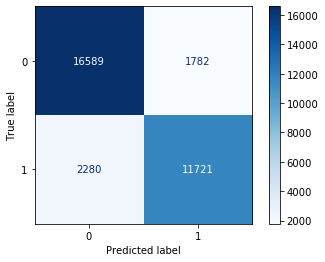

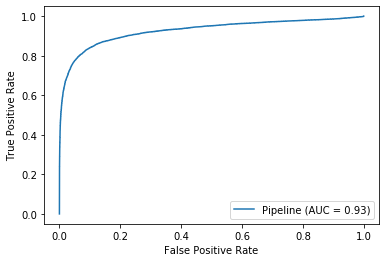

([0.8741183133398548],
 [0.8745211911528481],
 [0.8526060693746156],
 [0.8523123909249565],
 [0.9279383402797724],
 [0.9265509375519111])

In [44]:
# Add classifier to the Pipeline
clf_lg = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(random_state=24))])

clf_lg.fit(X_train, y_train)

result_lg = ef.evaluate(clf_lg, X_train, X_test, y_train, y_test)
result_lg

>**Comment:** *Baseline Model (Logistic Regression)*
- Test accuracy is 87.45% which is quite close to train accuracy 87.41%
- Test f1-score is 85.23% which is quite close to train f1-score 85.26%
- Test roc-auc score is 92.66% which is quite close to train roc-auc score 92.79%

### Decision Tree

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9997219790969469
F1 Score: 0.9996804620282377
ROC-AUC: 0.9999998425492285


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9463734091189917
F1 Score: 0.9381898454746136
ROC-AUC: 0.945797879216315


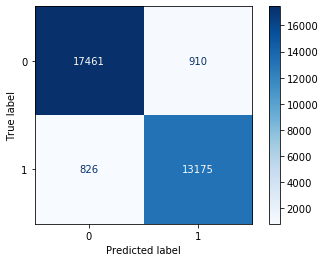

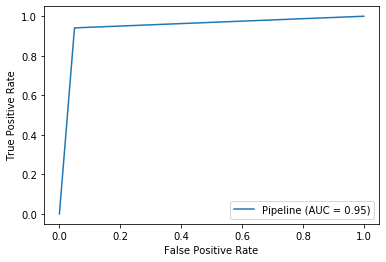

([0.9997219790969469],
 [0.9463734091189917],
 [0.9996804620282377],
 [0.9381898454746136],
 [0.9999998425492285],
 [0.945797879216315])

In [45]:
clf_dt = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='entropy', random_state=24))])

clf_dt.fit(X_train, y_train)

result_dt = ef.evaluate(clf_dt, X_train, X_test, y_train, y_test, use_decision_function='no')
result_dt

>**Comment:** *Decision Trees*
- Test accuracy is 94.64% while train accuracy is 99.97%. 
- Test f1-score is 93.82% while train f1-score is 99.97%
- Test roc-auc score is 94.58% while train roc-auc score is nearly perfect
- Much better than the baseline model, but slightly overfit

### Random Forest

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9997219790969469
F1 Score: 0.9996805225231621
ROC-AUC: 0.999999632471076


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9617261831212158
F1 Score: 0.9549929165607178
ROC-AUC: 0.9932287957487085


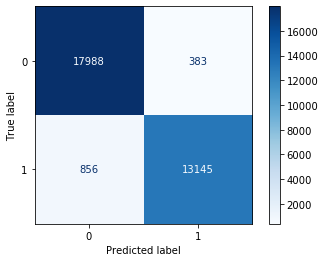

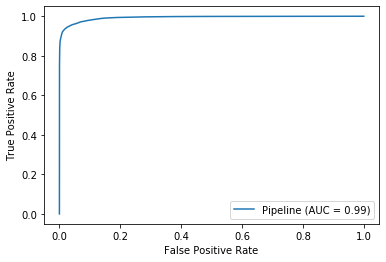

([0.9997219790969469],
 [0.9617261831212158],
 [0.9996805225231621],
 [0.9549929165607178],
 [0.999999632471076],
 [0.9932287957487085])

In [46]:
clf_rf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(criterion='entropy', random_state=24))])

clf_rf.fit(X_train, y_train)

result_rf = ef.evaluate(clf_rf, X_train, X_test, y_train, y_test, use_decision_function='no')
result_rf

>**Comment:** *Random Forests*
- Test accuracy is 96.17% while train accuracy is 99.97%
- Test f1-score is 95.50% while train f1-score is 99.97%
- Test roc-auc score is 99.32% while train roc-auc score is nearly perfect
- Much better than the baseline model, but slightly overfit
- Random Forests works better than Decision Trees

### XGBoost

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9399886732224683
F1 Score: 0.929993993993994
ROC-AUC: 0.9876373353246429


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9424811565550476
F1 Score: 0.9325704352864489
ROC-AUC: 0.9875821602686444


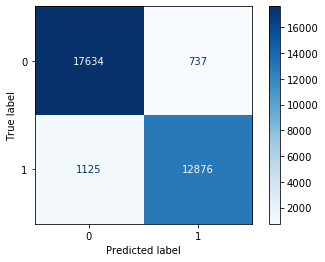

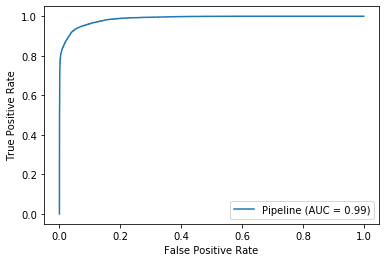

([0.9399886732224683],
 [0.9424811565550476],
 [0.929993993993994],
 [0.9325704352864489],
 [0.9876373353246429],
 [0.9875821602686444])

In [47]:
clf_xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', XGBClassifier(random_state=24))])

clf_xgb.fit(X_train, y_train)

result_xgb = ef.evaluate(clf_xgb, X_train, X_test, y_train, y_test, use_decision_function='no')
result_xgb

>**Comment:** *XGBoost*
- Test accuracy is 94.25% while train accuracy is 94.00%
- Test f1-score is 93.26% while train f1-score is 93.00%
- Test roc-auc score is 98.76% while train roc-auc score is 98.76%
- Much better than the baseline model, and train test differences are negligible

### AdaBoost

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9997219790969469
F1 Score: 0.999680598109614
ROC-AUC: 0.9999998425492285


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9545903867539849
F1 Score: 0.947274031563845
ROC-AUC: 0.9841633764186248


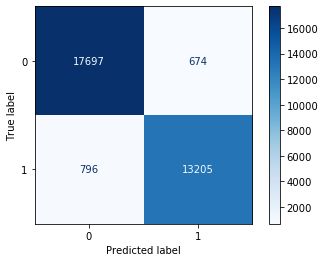

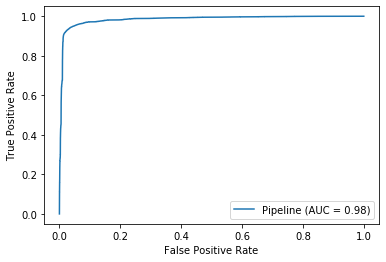

([0.9997219790969469],
 [0.9545903867539849],
 [0.999680598109614],
 [0.947274031563845],
 [0.9999998425492285],
 [0.9841633764186248])

In [48]:
clf_ada = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy'), random_state=24))])

clf_ada.fit(X_train, y_train)

result_ada = ef.evaluate(clf_ada, X_train, X_test, y_train, y_test, use_decision_function='no')
result_ada

>**Comment:** *AdaBoost*
- Test accuracy is 95.46% while train accuracy is 99.97%
- Test f1-score is 94.73% while train f1-score is 99.97%
- Test roc-auc score is 98.42% while train roc-auc score is nearly perfect
- Much better than the baseline model, but slightly overfit

### Gradient Boosting

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9417906605570715
F1 Score: 0.9322953470267682
ROC-AUC: 0.9875359092043156


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9425429383417768
F1 Score: 0.9328228835596648
ROC-AUC: 0.9874437104737859


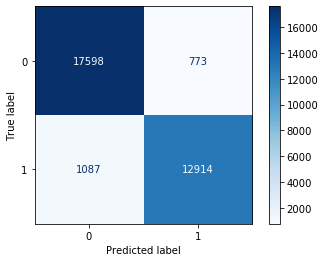

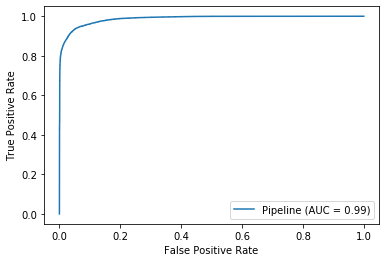

([0.9417906605570715],
 [0.9425429383417768],
 [0.9322953470267682],
 [0.9328228835596648],
 [0.9875359092043156],
 [0.9874437104737859])

In [49]:
clf_gb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=24))])

clf_gb.fit(X_train, y_train)

result_gb = ef.evaluate(clf_gb, X_train, X_test, y_train, y_test, use_decision_function='no')
result_gb

>**Comment:** *Gradient Boosting*
- Test accuracy is 94.25% while train accuracy is 94.18%
- Test f1-score is 93.28% while train f1-score is 93.23%
- Test roc-auc score is 98.74% while train roc-auc score is 98.75%
- Much better than the baseline model, and train test differences are negligible

### Bagging

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9964269165422437
F1 Score: 0.9958825274399289
ROC-AUC: 0.9999669899065436


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9597491659458791
F1 Score: 0.9526095653755229
ROC-AUC: 0.9890714354481807


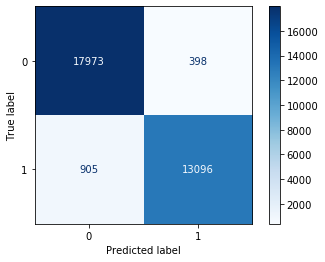

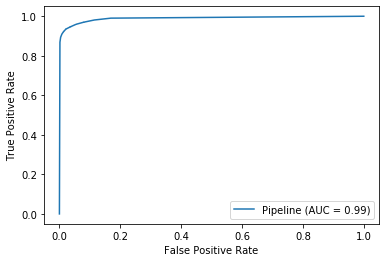

([0.9964269165422437],
 [0.9597491659458791],
 [0.9958825274399289],
 [0.9526095653755229],
 [0.9999669899065436],
 [0.9890714354481807])

In [50]:
clf_bag = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), random_state=24))])

clf_bag.fit(X_train, y_train)

result_bag = ef.evaluate(clf_bag, X_train, X_test, y_train, y_test, use_decision_function='no')
result_bag

>**Comment:** *Bagging*
- Test accuracy is 95.97% while train accuracy is 99.64%
- Test f1-score is 95.26% while train f1-score is 99.59%
- Test roc-auc score is 98.91% while train roc-auc score is nearly perfect
- Much better than the baseline model, but slightly overfit

## VI. Evaluation
- Put all classifiers' evaluation results into a dataframe and visualize as plots for better selecting
- Evaluation metrics follows in order: 
    - train/test accuracy
    - train/test f1-score 
    - train/test roc-auc score

In [51]:
# Preview the Bagging classifier evaluation result
result_bag[:] # This is a list in tuple

([0.9964269165422437],
 [0.9597491659458791],
 [0.9958825274399289],
 [0.9526095653755229],
 [0.9999669899065436],
 [0.9890714354481807])

In [52]:
# Want to change the tuple to list
sum(result_bag[:], []) # 1D list


# Alternate way
# list(np.concatenate(result_lg[:]).flat)

[0.9964269165422437,
 0.9597491659458791,
 0.9958825274399289,
 0.9526095653755229,
 0.9999669899065436,
 0.9890714354481807]

In [53]:
# Put all models' evaluation results in a list
model_results = [result_lg, result_dt, result_rf, result_xgb, result_ada, result_gb, result_bag]

In [54]:
# Change the tuple list to 1D list for each model and put the results in the new list
new_model_results = []

for result in model_results:
    result = sum(result[:], []) # Change to 1D list
    new_model_results.append(result)

In [55]:
new_model_results  # List in list

[[0.8741183133398548,
  0.8745211911528481,
  0.8526060693746156,
  0.8523123909249565,
  0.9279383402797724,
  0.9265509375519111],
 [0.9997219790969469,
  0.9463734091189917,
  0.9996804620282377,
  0.9381898454746136,
  0.9999998425492285,
  0.945797879216315],
 [0.9997219790969469,
  0.9617261831212158,
  0.9996805225231621,
  0.9549929165607178,
  0.999999632471076,
  0.9932287957487085],
 [0.9399886732224683,
  0.9424811565550476,
  0.929993993993994,
  0.9325704352864489,
  0.9876373353246429,
  0.9875821602686444],
 [0.9997219790969469,
  0.9545903867539849,
  0.999680598109614,
  0.947274031563845,
  0.9999998425492285,
  0.9841633764186248],
 [0.9417906605570715,
  0.9425429383417768,
  0.9322953470267682,
  0.9328228835596648,
  0.9875359092043156,
  0.9874437104737859],
 [0.9964269165422437,
  0.9597491659458791,
  0.9958825274399289,
  0.9526095653755229,
  0.9999669899065436,
  0.9890714354481807]]

In [56]:
# Create a blank dataframe 
# Columns names are different train-test metrics 
# Index are different classifiers' names

model_eva_df = pd.DataFrame(columns=['train_acc', 'test_acc', 
                                     'train_f1', 'test_f1', 
                                     'train_roc_auc', 'test_roc_auc'],
                            index=['LogisticRegression', 'DecisionTree', 'RandomForest', 
                                   'XGBoost', 'AdaBoost', 'GradientBoost', 'Bagging'])
model_eva_df

,train_acc,test_acc,train_f1,test_f1,train_roc_auc,test_roc_auc
LogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN
DecisionTree,NaN,NaN,NaN,NaN,NaN,NaN
RandomForest,NaN,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN,NaN
AdaBoost,NaN,NaN,NaN,NaN,NaN,NaN
GradientBoost,NaN,NaN,NaN,NaN,NaN,NaN
Bagging,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Append the new_models_results to the corresponding position in the dataframe

for i in range(7): # total of 7 classifiers
    # For each inner list
    # 1st element: train_acc
    model_eva_df['train_acc'][i] = new_model_results[i][0]
    
    # 2nd element: test_acc
    model_eva_df['test_acc'][i] = new_model_results[i][1]
    
    # 3rd element: train_f1
    model_eva_df['train_f1'][i] = new_model_results[i][2]
    
    # 4th element: test_f1
    model_eva_df['test_f1'][i] = new_model_results[i][3]
    
    # 5th element: train_roc_auc
    model_eva_df['train_roc_auc'][i] = new_model_results[i][4]
    
    # 6th element: test_roc_auc
    model_eva_df['test_roc_auc'][i] = new_model_results[i][5]

In [58]:
# Reset the index
model_eva_df.reset_index(inplace=True)

# Change the original "index" to "classifier"
model_eva_df.rename(columns={'index':'classifier'}, inplace=True)

# Preview
model_eva_df

,classifier,train_acc,test_acc,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.874118,0.874521,0.852606,0.852312,0.927938,0.926551
1,DecisionTree,0.999722,0.946373,0.99968,0.93819,1,0.945798
2,RandomForest,0.999722,0.961726,0.999681,0.954993,1,0.993229
3,XGBoost,0.939989,0.942481,0.929994,0.93257,0.987637,0.987582
4,AdaBoost,0.999722,0.95459,0.999681,0.947274,1,0.984163
5,GradientBoost,0.941791,0.942543,0.932295,0.932823,0.987536,0.987444
6,Bagging,0.996427,0.959749,0.995883,0.95261,0.999967,0.989071


In [59]:
# Add new columns to find the difference between train-test metrics
model_eva_df['acc_diff'] = abs(model_eva_df['train_acc'] - model_eva_df['test_acc'])
model_eva_df['f1_diff'] = abs(model_eva_df['train_f1'] - model_eva_df['test_f1'])
model_eva_df['roc_auc_diff'] = abs(model_eva_df['train_roc_auc'] - model_eva_df['test_roc_auc'])

In [60]:
# Preview
model_eva_df

,classifier,train_acc,test_acc,train_f1,test_f1,train_roc_auc,test_roc_auc,acc_diff,f1_diff,roc_auc_diff
0,LogisticRegression,0.874118,0.874521,0.852606,0.852312,0.927938,0.926551,0.000402878,0.000293678,0.0013874
1,DecisionTree,0.999722,0.946373,0.99968,0.93819,1,0.945798,0.0533486,0.0614906,0.054202
2,RandomForest,0.999722,0.961726,0.999681,0.954993,1,0.993229,0.0379958,0.0446876,0.00677084
3,XGBoost,0.939989,0.942481,0.929994,0.93257,0.987637,0.987582,0.00249248,0.00257644,5.51751e-05
4,AdaBoost,0.999722,0.95459,0.999681,0.947274,1,0.984163,0.0451316,0.0524066,0.0158365
5,GradientBoost,0.941791,0.942543,0.932295,0.932823,0.987536,0.987444,0.000752278,0.000527537,9.21987e-05
6,Bagging,0.996427,0.959749,0.995883,0.95261,0.999967,0.989071,0.0366778,0.043273,0.0108956


### Plot Test Accuracy

In [61]:
xs = model_eva_df['classifier'].tolist()      # Classifier name
ys = (model_eva_df['test_acc']*100).tolist()  # Test accuracy (in %)

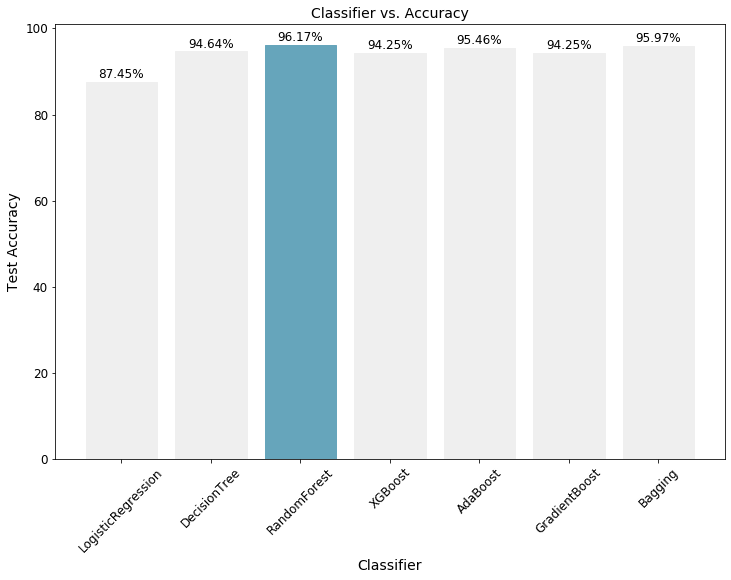

In [62]:
plt.figure(figsize=(12,8))

ax = plt.bar(xs, ys)
for i in range(7): 
    if i!=2:
        ax[i].set_color('#efefef')
    else:
        ax[2].set_color('#66a5bb') # highest test accuracy

plt.xlabel('Classifier', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.ylabel('Test Accuracy', fontsize=14)
plt.yticks(fontsize=12)

plt.title('Classifier vs. Accuracy', fontsize=14)

# Zip join x and y coordinates in pairs
for x,y in zip(xs,ys):
    label = "{:,.2f}%".format(y)
    plt.annotate(label,                       # this is the text
                 (x,y),                       # this is the coordination point the label
                 textcoords="offset points",  # how to position the text
                 xytext=(0,4),                # distance from text to points (x,y)
                 ha='center',
                 fontsize=12)                 # center horizontal alignment

plt.grid(b=False)                             # turn off the gird

plt.savefig("./images/classifier vs accuracy.png", dpi=300, bbox_inches='tight')
plt.show()

>**Comment:** 
- Baseline (Logistic Regression) has a test accuracy of 87.45%
- <b>Random Forest</b> classifier has the highest test accuracy 96.17% among all

### Plot Train Test Difference

In [63]:
# Classifiers' names
clf = model_eva_df['classifier'].tolist()

# Train-Test accuracy difference
acc = model_eva_df['acc_diff'].tolist()

# Train-Test f1-score difference
f1 = model_eva_df['f1_diff'].tolist()

# Train-Test roc-auc score difference
rocauc = model_eva_df['roc_auc_diff'].tolist()

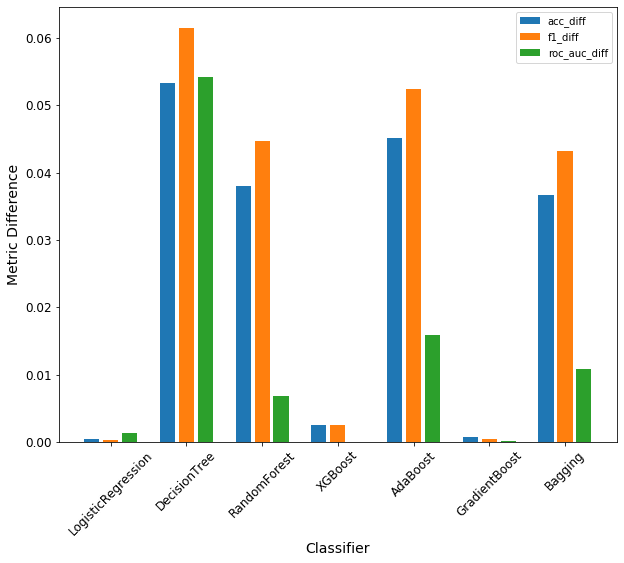

In [64]:
# Plot train-test metric difference for each classifier
plt.figure(figsize=(10, 8))

x = np.arange(7) # Total of 7 classifiers
bar_width = 0.2
plt.bar(x-0.25, acc, width=bar_width, label='acc_diff')         # Accuracy
plt.bar(x, f1, width=bar_width, label='f1_diff')                # F1-score
plt.bar(x+0.25, rocauc, width=bar_width, label='roc_auc_diff')  # ROC-AUC score

plt.xticks(x, clf)
plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Classifier', fontsize=14)

plt.yticks(fontsize=12)
plt.ylabel('Metric Difference', fontsize=14)

plt.legend()
plt.show()

>**Evaluation Results:**
- Tree based classifers (DecisionTree, RandomForest, Bagging) and AdaBoost have a 0.01~0.06 difference between train and test sets
- XGBoost and GradientBoost have negligible train test difference


- Compare with the test accuracy plot, and select a classifier with small difference between train test sets


- Final Result: <b>*RandomForest*</b>

## Tunning Hyperparameter
- Try different hyperparameter to see if can increase the test accuracy and reduce train test difference to solve the slightly overfitting issue

Best parameter's score: 0.960737):
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 6}
Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.988446686917572
F1 Score: 0.9866285305684661
ROC-AUC: 0.9996646162685245


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9626529099221549
F1 Score: 0.9560954352325962
ROC-AUC: 0.9937795624145932


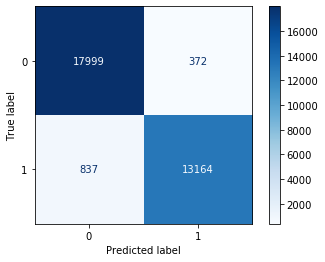

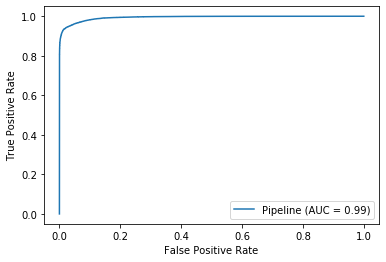

([0.988446686917572],
 [0.9626529099221549],
 [0.9866285305684661],
 [0.9560954352325962],
 [0.9996646162685245],
 [0.9937795624145932])

In [65]:
# This should take a little bit longer
param_grid = {'classifier__max_depth':[None, 35, 40],
              'classifier__min_samples_split':[2, 6, 10],
              'classifier__min_samples_leaf':[1, 4, 10]
              }

search = GridSearchCV(clf_rf, param_grid, n_jobs=-1, cv=3, scoring='accuracy')

search.fit(X_train, y_train)

print(f"Best parameter's score: {search.best_score_:0.6f}):")
print(search.best_params_)

ef.evaluate(search.best_estimator_, X_train, X_test, y_train, y_test, use_decision_function='no')

>**Comment:** *Hyperparameter GridSearch Result*
- max_depth = None (default)
- min_sample_leaf = 1 (default)
- min_sample_split = 6

### RandomForest after Hyperparameter tunning

Training Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.988446686917572
F1 Score: 0.9866285305684661
ROC-AUC: 0.9996646162685245


Testing Scores
-*-*-*-*-*-*-*-*
Accuracy: 0.9626529099221549
F1 Score: 0.9560954352325962
ROC-AUC: 0.9937795624145932


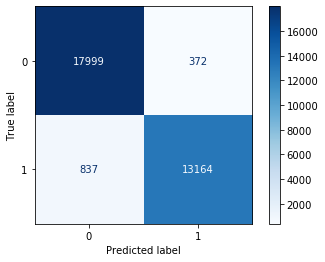

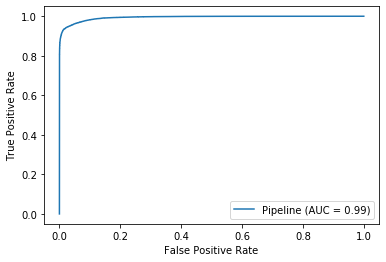

([0.988446686917572],
 [0.9626529099221549],
 [0.9866285305684661],
 [0.9560954352325962],
 [0.9996646162685245],
 [0.9937795624145932])

In [66]:
clf_rf2 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(criterion='entropy', random_state=24,
                                          min_samples_split=6))])

clf_rf2.fit(X_train, y_train)

result_rf2 = ef.evaluate(clf_rf2, X_train, X_test, y_train, y_test, use_decision_function='no')
result_rf2

In [67]:
# Compare the RandomForest: default parameter and hyperparameter tunning
# Create a blank dataframe
rf_compare_df = pd.DataFrame(columns=['train_acc', 'test_acc', 
                                      'train_f1', 'test_f1', 
                                      'train_roc_auc', 'test_roc_auc'],
                             index=['clf_rf (default)', 'clf_rf2 (hyper)'])
rf_compare_df

,train_acc,test_acc,train_f1,test_f1,train_roc_auc,test_roc_auc
clf_rf (default),NaN,NaN,NaN,NaN,NaN,NaN
clf_rf2 (hyper),NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Put two RandomForest result in one list
rf_list = [result_rf, result_rf2]
rf_list

[([0.9997219790969469],
  [0.9617261831212158],
  [0.9996805225231621],
  [0.9549929165607178],
  [0.999999632471076],
  [0.9932287957487085]),
 ([0.988446686917572],
  [0.9626529099221549],
  [0.9866285305684661],
  [0.9560954352325962],
  [0.9996646162685245],
  [0.9937795624145932])]

In [69]:
# Create a new new_rf_list by changing the tuple to list
new_rf_list = []

for rf in rf_list:
    rf = sum(rf[:], []) # Change to 1D list
    new_rf_list.append(rf)

In [70]:
# Preview
new_rf_list

[[0.9997219790969469,
  0.9617261831212158,
  0.9996805225231621,
  0.9549929165607178,
  0.999999632471076,
  0.9932287957487085],
 [0.988446686917572,
  0.9626529099221549,
  0.9866285305684661,
  0.9560954352325962,
  0.9996646162685245,
  0.9937795624145932]]

In [71]:
for i in range(2): # 2 comparison
    # For each inner list
    # 1st element: train_acc      
    rf_compare_df['train_acc'][i] = new_rf_list[i][0]
    
    # 2nd element: test_acc
    rf_compare_df['test_acc'][i] = new_rf_list[i][1]
    
    # 3rd element: train_f1
    rf_compare_df['train_f1'][i] = new_rf_list[i][2]
    
    # 4th element: test_f1
    rf_compare_df['test_f1'][i] = new_rf_list[i][3]
    
    # 5th element: train_roc_auc
    rf_compare_df['train_roc_auc'][i] = new_rf_list[i][4]
    
    # 6th element: test_roc_auc
    rf_compare_df['test_roc_auc'][i] = new_rf_list[i][5]  

In [72]:
# Preview
rf_compare_df

,train_acc,test_acc,train_f1,test_f1,train_roc_auc,test_roc_auc
clf_rf (default),0.999722,0.961726,0.999681,0.954993,1,0.993229
clf_rf2 (hyper),0.988447,0.962653,0.986629,0.956095,0.999665,0.99378


In [73]:
# Add new columns to find the difference between train-test metrics
rf_compare_df['acc_dff'] = abs(rf_compare_df['train_acc'] - rf_compare_df['test_acc'])
rf_compare_df['f1_dff'] = abs(rf_compare_df['train_f1'] - rf_compare_df['test_f1'])
rf_compare_df['rocauc_dff'] = abs(rf_compare_df['train_roc_auc'] - rf_compare_df['test_roc_auc'])

In [74]:
rf_compare_df

,train_acc,test_acc,train_f1,test_f1,train_roc_auc,test_roc_auc,acc_dff,f1_dff,rocauc_dff
clf_rf (default),0.999722,0.961726,0.999681,0.954993,1,0.993229,0.0379958,0.0446876,0.00677084
clf_rf2 (hyper),0.988447,0.962653,0.986629,0.956095,0.999665,0.99378,0.0257938,0.0305331,0.00588505


>**Comment:** *After hyperparameter tunning*
- The clf_rf2 test accuracy has increased to 96.27% which is slightly better than clf_rf 96.17% 
- Overall train test differences were also reduced
- <b>Hyperparameter tunning did improve model performance</b>

## Evaluation Result
- Compare with the baseline (Logistic Regression) test accuracy (87.45%) and other classifiers, <b>RandomForest</b> Classifier has the highest test accuracy (96.27%) after hyperparameter tunning. This model (clf_rf2) will be selected for further analysis.

## Q2. What are the critical features that have stronger impact on satisfaction rate?

### Note: Feature Importance
- scikit-learn has a feature_importances_ attribute to calculate the score of input features based on how useful they are in predicting a target variable 
- The returning result shows a list of numbers. For better understanding, we need the predictor names to pair with those numbers
- Some categorical columns names were changed after OHE transformation, so we need to get those features' names from Pipeling preprocessing step

In [75]:
# Predictors
for ind, var in enumerate(X.columns.tolist()):
    print(ind, var)

0 Customer Type
1 Age
2 Type of Travel
3 Class
4 Flight Distance
5 Inflight wifi service
6 Departure/Arrival time convenient
7 Ease of Online booking
8 Gate location
9 Food and drink
10 Online boarding
11 Seat comfort
12 Inflight entertainment
13 On-board service
14 Leg room service
15 Baggage handling
16 Checkin service
17 Inflight service
18 Cleanliness
19 Status


In [76]:
# Survey features' with unchanged names
unchanged_names = X.columns[5:-1].tolist()
unchanged_names

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

In [77]:
clf_rf2

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                              

In [78]:
# Extract categorical features' names at preprocess ohe step
ohe_names = clf_rf2['preprocess'].transformers_[1][1]['ohe']\
                                 .get_feature_names(cat_cols).tolist()
ohe_names

['Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Age_Adult',
 'Age_Middle',
 'Age_Senior',
 'Age_Young',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'Flight Distance_long',
 'Flight Distance_medium',
 'Flight Distance_short',
 'Status_Delay',
 'Status_On time']

In [79]:
# Status is the last column in my dataframe, so need to split into two name lists
ohe_first = ohe_names[:-2]
print(ohe_first)
print("\n")
ohe_last = ohe_names[-2:]
print(ohe_last)

['Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Age_Adult', 'Age_Middle', 'Age_Senior', 'Age_Young', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Flight Distance_long', 'Flight Distance_medium', 'Flight Distance_short']


['Status_Delay', 'Status_On time']


In [80]:
# Combine all the predictors' names
var_names = ohe_first + unchanged_names + ohe_last
var_names

['Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Age_Adult',
 'Age_Middle',
 'Age_Senior',
 'Age_Young',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus',
 'Flight Distance_long',
 'Flight Distance_medium',
 'Flight Distance_short',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Status_Delay',
 'Status_On time']

In [81]:
# Get the feature importance
rf_coef = clf_rf2.steps[1][1].feature_importances_
rf_coef

array([0.15825878, 0.01749809, 0.04847729, 0.01651206, 0.0129736 ,
       0.15599108, 0.05045634, 0.042129  , 0.03255574, 0.03718403,
       0.03253736, 0.03104991, 0.03006228, 0.03026861, 0.02683982,
       0.02739316, 0.00460238, 0.00725321, 0.00273912, 0.00254074,
       0.05412283, 0.06552863, 0.05510075, 0.03691989, 0.00306364,
       0.0028673 , 0.00321699, 0.00456178, 0.00367355, 0.00362203])

In [82]:
# Combine the predictor names and feature importance scores
feat_imp = dict(zip(var_names, rf_coef))
feat_imp_df = pd.DataFrame(list(feat_imp.items()), columns=['variable', 'score'])
feat_imp_df.sort_values(by='score',  ascending=False).reset_index(drop=True)

,variable,score
0,Customer Type_Loyal Customer,0.158259
1,Age_Young,0.155991
2,Inflight entertainment,0.065529
3,On-board service,0.055101
4,Seat comfort,0.054123
5,Type of Travel_Business travel,0.050456
6,Age_Adult,0.048477
7,Type of Travel_Personal Travel,0.042129
8,Class_Eco,0.037184
9,Leg room service,0.036920


>**Comment:** *Features Importance*
- The top 5 features which have greater impact on satisfaction are:
    - Loyal Customers
    - Young age group customers
    - Inflight entertainment
    - On-board service
    - Seat comfort

### eli5

In [83]:
import eli5
# Need sklearn version 0.23.1

In [84]:
eli5.show_weights(clf_rf2.steps[1][1], feature_names=var_names, top=30, show_feature_values=True)

Weight,Feature
0.1583 ± 0.0800,Customer Type_Loyal Customer
0.1560 ± 0.1680,Age_Young
0.0655 ± 0.1260,Inflight entertainment
0.0551 ± 0.1361,On-board service
0.0541 ± 0.1196,Seat comfort
0.0505 ± 0.0808,Type of Travel_Business travel
0.0485 ± 0.0334,Age_Adult
0.0421 ± 0.0726,Type of Travel_Personal Travel
0.0372 ± 0.0499,Class_Eco
0.0369 ± 0.1099,Leg room service


>**Comment:** *eli5*
- The top 5 features which have greater impact on satisfaction are:
    - Loyal Customers
    - Young age group customers
    - Inflight entertainment
    - On-board service
    - Seat comfort

### Permutation Importance

In [85]:
from sklearn.inspection import permutation_importance

In [86]:
per_imp = permutation_importance(clf_rf2, X_test, y_test, random_state=24)
per_imp

{'importances_mean': array([ 7.93339923e-02,  6.23996046e-04,  1.80106265e-01,  1.65142716e-02,
         4.32472507e-05,  1.21734833e-01,  4.94254294e-04,  1.97701718e-03,
         1.14296305e-03, -9.26726801e-05,  3.20956382e-02,  2.28777956e-02,
         5.21438280e-03,  7.85864327e-03,  3.68219449e-03,  2.67638700e-02,
         2.74311133e-02,  2.52378599e-02,  1.42901273e-02,  6.05461510e-04]),
 'importances_std': array([0.00128758, 0.00027519, 0.00137409, 0.00027114, 0.00027946,
        0.00102888, 0.00020676, 0.00017032, 0.00014223, 0.0003132 ,
        0.00048765, 0.00081627, 0.00044654, 0.0005528 , 0.00031223,
        0.0005617 , 0.00049154, 0.00101443, 0.000603  , 0.00024527]),
 'importances': array([[ 7.91424688e-02,  7.69801063e-02,  8.07179044e-02,
          8.01618683e-02,  7.96676140e-02],
        [ 9.88508588e-04,  4.32472507e-04,  4.32472507e-04,
          3.39799827e-04,  9.26726801e-04],
        [ 1.80279254e-01,  1.82472507e-01,  1.79846781e-01,
          1.79723218e-

In [87]:
v_name = X.columns.tolist() # predictor names
p_imp = per_imp['importances_mean'].tolist()

In [88]:
# Pair the predictor names with corresponding permutation importance scores
per_dict = dict(zip(v_name, p_imp))
per_df = pd.DataFrame(list(per_dict.items()), columns=['variable', 'score'])
per_df.sort_values(by='score',  ascending=False).reset_index(drop=True)

,variable,score
0,Type of Travel,0.180106
1,Inflight wifi service,0.121735
2,Customer Type,0.079334
3,Online boarding,0.032096
4,Checkin service,0.027431
5,Baggage handling,0.026764
6,Inflight service,0.025238
7,Seat comfort,0.022878
8,Class,0.016514
9,Cleanliness,0.014290


>**Comment:** *Permutation Importance*
- Permutation result shows the [low cardinality](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py) categorical feature
- The top 5 features which have greater impact on satisfaction are:
    - Type of Travel
    - Inflight wifi service
    - Customer Type
    - Online boarding
    - Checkin service

## Answer for Q2
- 3 different feature importance methods were used to find the critical features that have great impact on satisfaction. Feature importance and eli5 show the same result for top 5 features, while permutation importance shows totally different result.
- Since my data doesn't have too many categorical columns (no biased issue towards high cadinality features). I would use the results from feature importance or eli5
    - Loyal Customers
    - Young age group customers
    - Inflight entertainment
    - On-board service
    - Seat comfort

## Q3. Which class has the highest dissatisfaction rate?
- Eco Class has the highest dissatisfaction rate

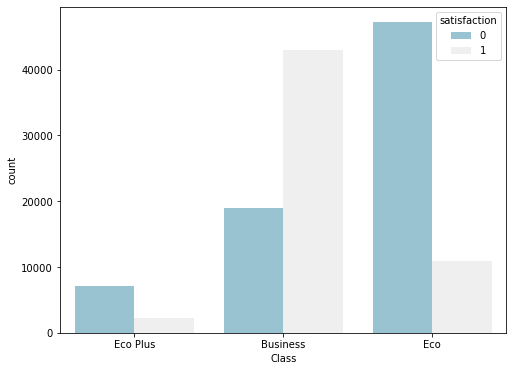

In [89]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=data, x='Class', hue='satisfaction', palette=['#91C7DA', '#efefef'])

plt.savefig("./images/class dissatisfaction.png", dpi=300, bbox_inches='tight') 
plt.show()

In [90]:
def plot_survey_vs_satisfaction (sub_df):
    '''
    Plot each survey rating with satisfaction rate
    
    Input:
    sub_df: Sub-dataframe acquired from the data only contains target groups
    
    No Outpus
    '''
    fig, ax = plt.subplots(3, 5, figsize=(30, 20))
    for variable, subplot in zip(survey_cols, ax.flatten()):
        sns.countplot(sub_df[variable], hue=sub_df['satisfaction'], ax=subplot)

### sub_df

In [91]:
# Create a subdataframe only contains customers from Eco Class
eco_class = data.loc[data['Class'] == "Eco"]

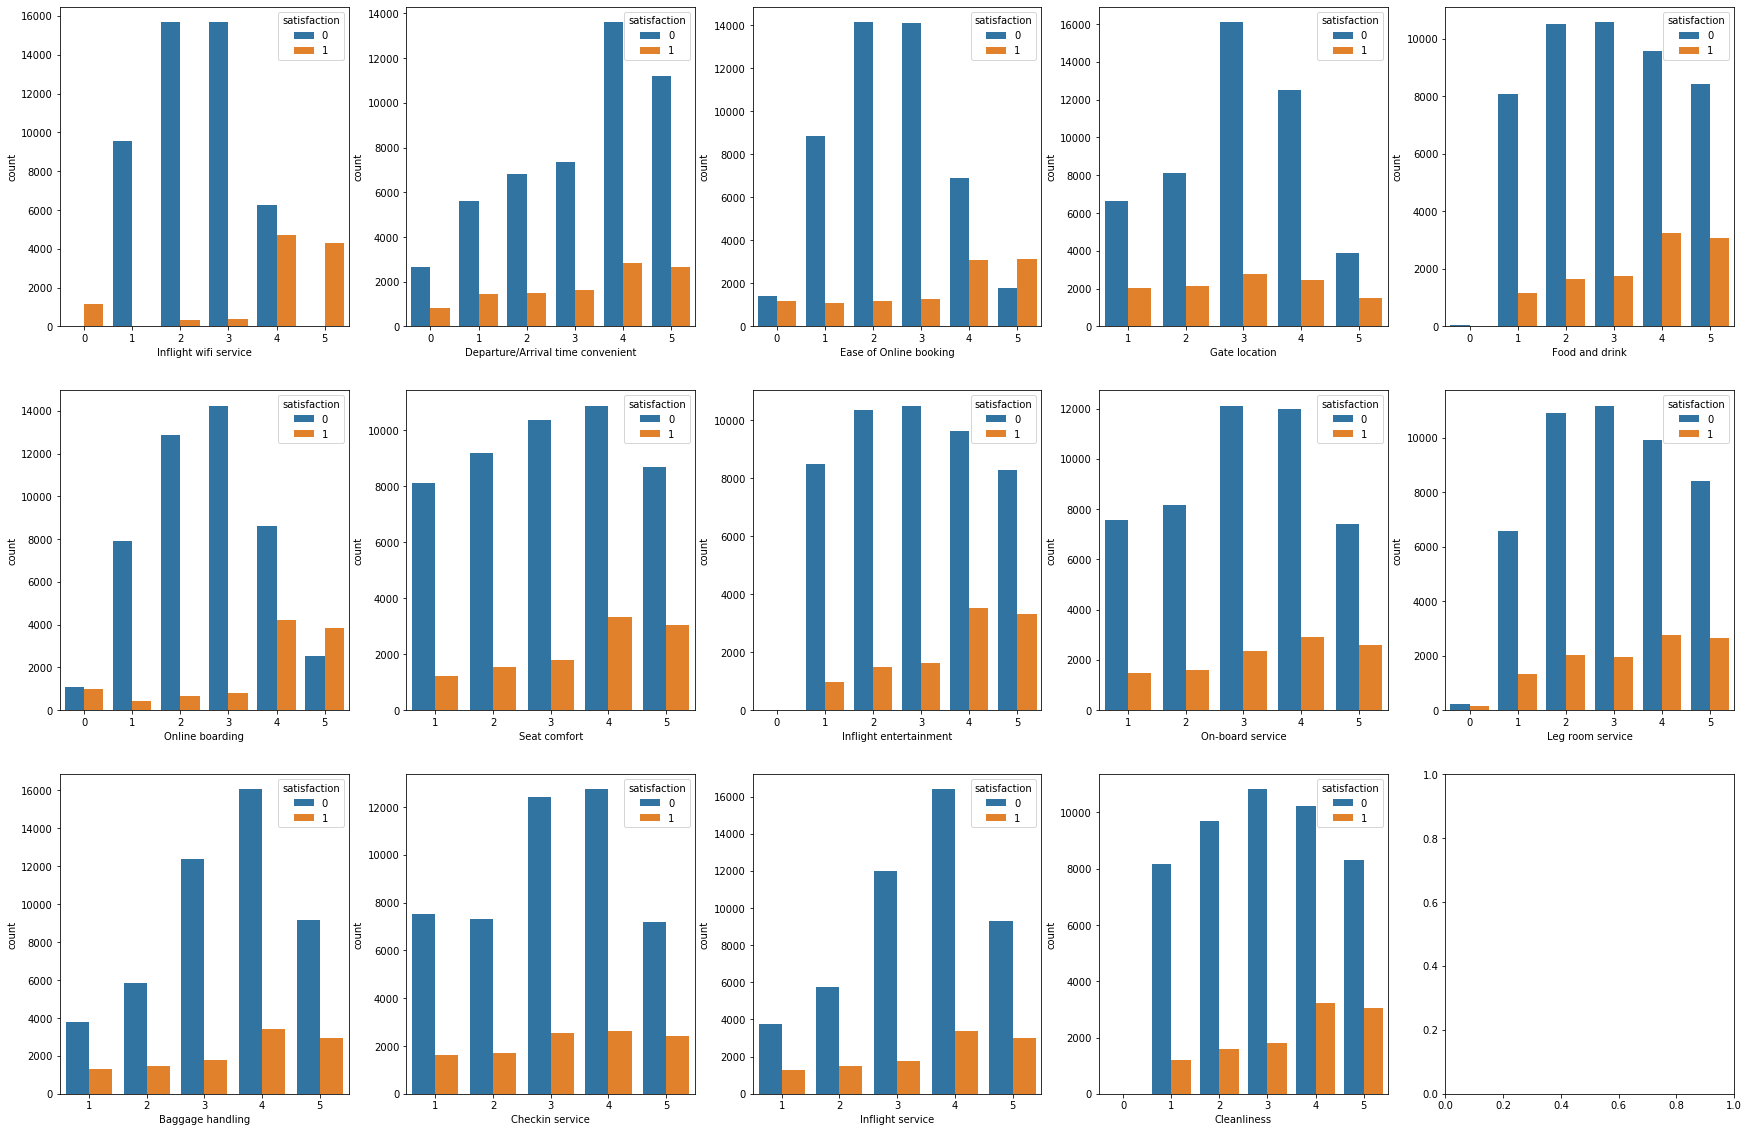

In [92]:
plot_survey_vs_satisfaction(eco_class)

>**Insight:** 
- If customers gave less 4 and 5 for those survey features, which means they gave more 1, 2 or 3
- Count the number of rating of 4 and 5 and sort them to find the top 3 survey features what has lower number of rating of 4 and 5

### survey_df

In [93]:
# Create a blank dataframe with survey features as columns' names
eco_class_survey = pd.DataFrame(columns=survey_cols.tolist())
eco_class_survey

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness


In [94]:
# Input value_counts of each survey features to the blank survey dataframe
for cols in eco_class_survey:
    for i in range(eco_class_survey.shape[1]):
        eco_class_survey[eco_class_survey.columns[i]] = eco_class[survey_cols[i]].value_counts(normalize=True)

In [95]:
# Preview
eco_class_survey.sort_index(inplace=True)
eco_class_survey

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.020029,0.060550,0.044651,NaN,0.001239,0.035188,NaN,0.000069,NaN,0.006625,NaN,NaN,NaN,0.000069
1,0.164083,0.121118,0.170484,0.148580,0.158818,0.143332,0.160745,0.162362,0.155600,0.135950,0.087341,0.157527,0.085792,0.161313
2,0.275737,0.142867,0.263451,0.176127,0.209078,0.232583,0.184249,0.203658,0.167903,0.222758,0.125712,0.155067,0.124955,0.194590
3,0.276700,0.154137,0.264656,0.325275,0.212124,0.258943,0.208906,0.208287,0.248929,0.226216,0.244300,0.258031,0.237349,0.217269
4,0.189032,0.283342,0.172342,0.257050,0.220624,0.220624,0.244421,0.226233,0.255863,0.218525,0.334635,0.264122,0.340124,0.231481
5,0.074419,0.237985,0.084416,0.092968,0.198118,0.109331,0.201679,0.199391,0.171705,0.189927,0.208011,0.165253,0.211780,0.195278


In [96]:
# Only counts the sum of (value_counts) rating of 4 and 5
sum_4_5 = eco_class_survey.iloc[4] + eco_class_survey.iloc[5]
sum_4_5

Inflight wifi service                0.263451
Departure/Arrival time convenient    0.521328
Ease of Online booking               0.256758
Gate location                        0.350018
Food and drink                       0.418742
Online boarding                      0.329955
Seat comfort                         0.446100
Inflight entertainment               0.425624
On-board service                     0.427569
Leg room service                     0.408452
Baggage handling                     0.542647
Checkin service                      0.429375
Inflight service                     0.551904
Cleanliness                          0.426760
dtype: float64

### sum_45_df

In [97]:
# Create a blank dataframe with survey features' names and sum of (value_counts) rating of 4 and 5
eco_45 = pd.DataFrame(columns=['features', 'sum_rating'])
eco_45

,features,sum_rating


In [98]:
# Input the result from sum_4_5 Series
eco_45['features'] = sum_4_5.index
eco_45['sum_rating'] = sum_4_5.values
eco_45

,features,sum_rating
0,Inflight wifi service,0.263451
1,Departure/Arrival time convenient,0.521328
2,Ease of Online booking,0.256758
3,Gate location,0.350018
4,Food and drink,0.418742
5,Online boarding,0.329955
6,Seat comfort,0.446100
7,Inflight entertainment,0.425624
8,On-board service,0.427569
9,Leg room service,0.408452


In [99]:
# Sort the values from smallest to largest and reset the index
eco_45 = eco_45.sort_values(by='sum_rating').reset_index(drop=True)
eco_45

,features,sum_rating
0,Ease of Online booking,0.256758
1,Inflight wifi service,0.263451
2,Online boarding,0.329955
3,Gate location,0.350018
4,Leg room service,0.408452
5,Food and drink,0.418742
6,Inflight entertainment,0.425624
7,Cleanliness,0.426760
8,On-board service,0.427569
9,Checkin service,0.429375


>**Comment:** *Eco Class*
- Eco Class customers give less high rating(4 or 5) on those survey features:
    - Ease of Online booking
    - Inflight wifi service
    - Online boarding

In [100]:
def find_number_of_total_rating_of_45(survey_df, sub_df, sum_45_df):
    '''
    Need to extract one subdataframe(sub_df) 
    and create two blank dataframes(survey_df, sum_45_df) first **
    
    Input:
    survey_df: Survey dataframes which contains value_counts of all survey features 
    
    sub_df: Subdataframe which only contains data relates to the target group
    - ex. Eco Class
    
    sum_45_df: Result dataframe contains sum of value_counts of rating of 4 and 5
    
    Output:
    Return a dataframe of survey features with corresponding sum of value_counts of rating of 4 and 5
    '''
    
    # Input value_counts of each survey features to the blank survey_df
    for cols in survey_df:
        for i in range(survey_df.shape[1]):
            survey_df[survey_df.columns[i]] = sub_df[survey_cols[i]].value_counts(normalize=True)
                                                    # survey_cols is a pre-defined column which 
                                                    # only contains the survey features
    # Sort the survey_df index with ascending order
    survey_df.sort_index(inplace=True)
    
    # Create a Series only counts the sum of rating of 4 and 5
    sum_4_5 = survey_df.iloc[4] + survey_df.iloc[5] # Series
    
    # Input the result from sum_4_5 Series
    sum_45_df['features'] = sum_4_5.index
    sum_45_df['sum_rating'] = sum_4_5.values
    
    # Sort the values with ascending order and reset the index
    sum_45_df = sum_45_df.sort_values(by='sum_rating').reset_index(drop=True)
    
    return sum_45_df

## Q4. Which flight haul has the highest dissatisfaction rate?
- Short Haul has the highest dissatisfaction rate

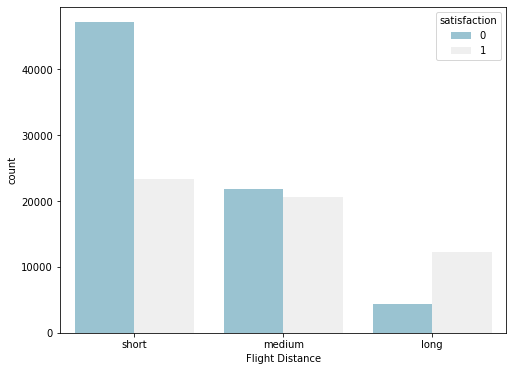

In [101]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=data, x='Flight Distance', hue='satisfaction', palette=['#91C7DA', '#efefef']);

plt.savefig("./images/flight haul dissatisfaction.png", dpi=300, bbox_inches='tight') 
plt.show()

### sub_df

In [102]:
# Create a subdataframe only contains customers who took short haul flight
short_haul = data.loc[data['Flight Distance'] == "short"]

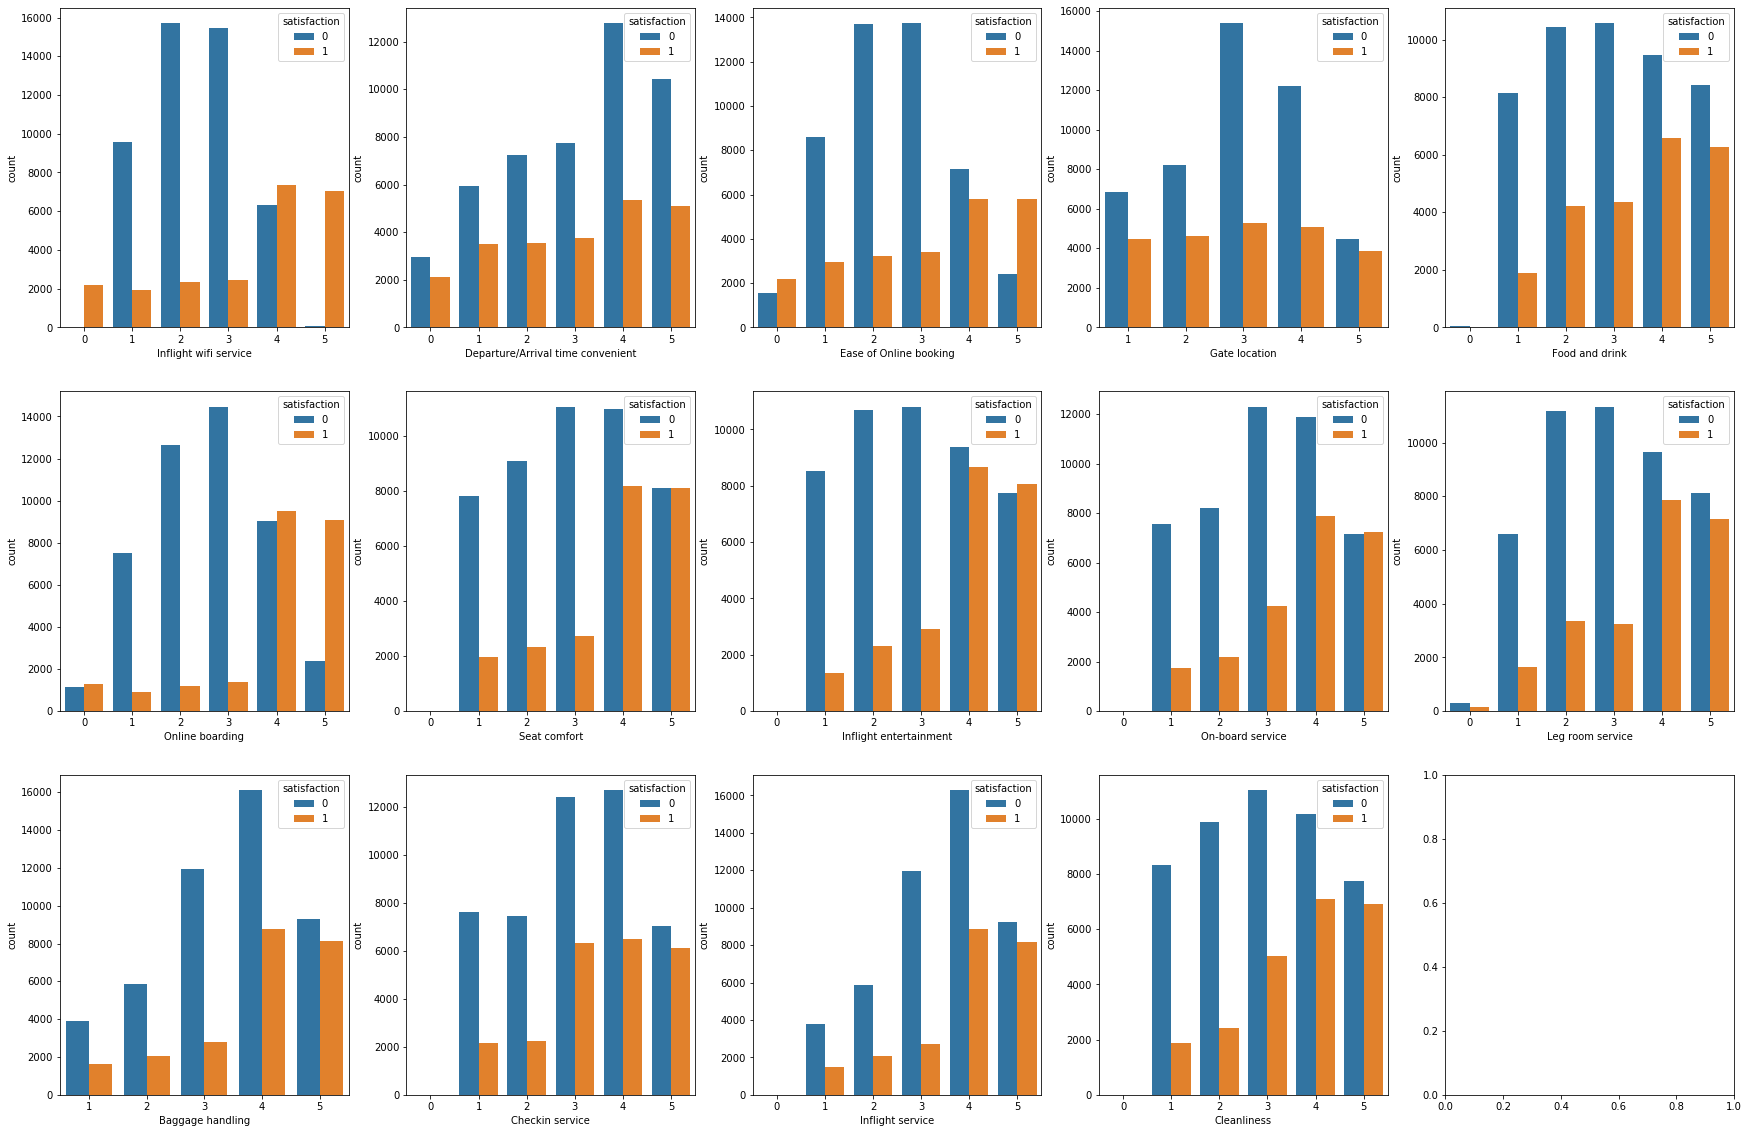

In [103]:
plot_survey_vs_satisfaction(short_haul)

### survey_df

In [104]:
# Create a blank dataframe with survey features as columns' names
short_haul_survey = pd.DataFrame(columns=survey_cols.tolist())
short_haul_survey

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness


### sum_45_df

In [105]:
# Create a blank dataframe with survey features' names and sum rating of 4 and 5
short_45 = pd.DataFrame(columns=['features', 'sum_rating'])
short_45

,features,sum_rating


In [106]:
find_number_of_total_rating_of_45(short_haul_survey, short_haul, short_45)

,features,sum_rating
0,Inflight wifi service,0.294902
1,Ease of Online booking,0.299485
2,Gate location,0.363162
3,Online boarding,0.424838
4,Food and drink,0.436302
5,Cleanliness,0.452576
6,Checkin service,0.458819
7,Leg room service,0.464693
8,Departure/Arrival time convenient,0.477831
9,Inflight entertainment,0.480300


>**Comment:** *Short Haul*
- Short Haul customers give less high rating(4 or 5) on those survey features:
    - Inflight wifi service
    - Ease of Online booking
    - Gate location

## Q5. Which age group has the highest dissatisfaction rate?
- Adult group has the highest dissatisfaction

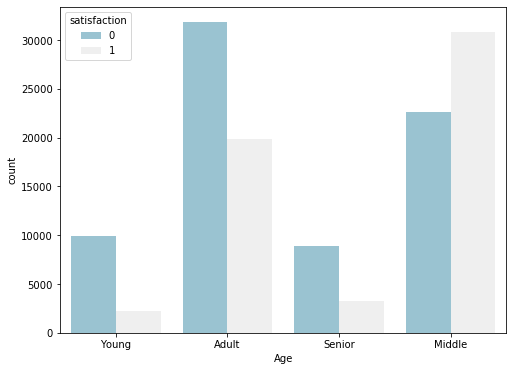

In [107]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=data, x='Age', hue='satisfaction', palette=['#91C7DA', '#efefef'])

plt.savefig("./images/group dissatisfaction.png", dpi=300, bbox_inches='tight') 
plt.show()

### sub_df

In [108]:
# Create a subdataframe only contains customers who were in Adult age group
group_adult = data.loc[data['Age'] == "Adult"]

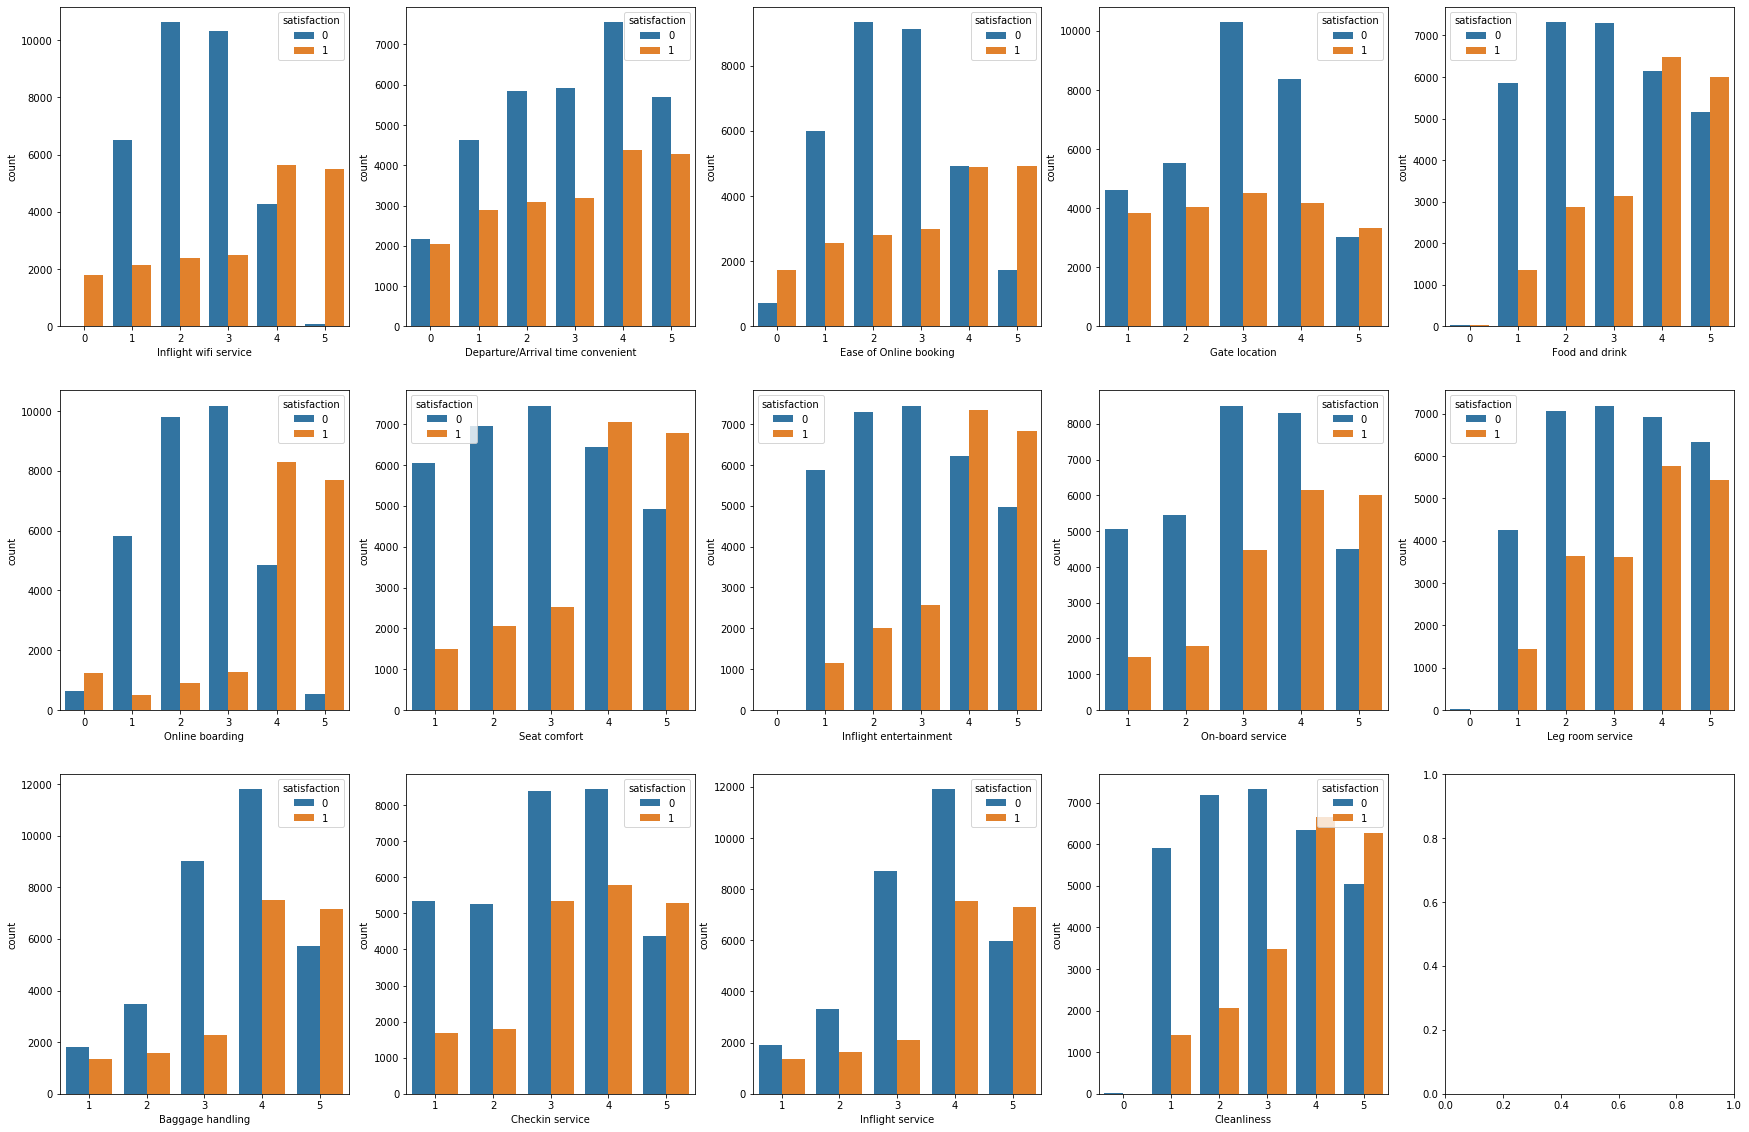

In [109]:
plot_survey_vs_satisfaction(group_adult)

### survey_df

In [110]:
# survey_df (blank)
group_adult_survey = pd.DataFrame(columns=survey_cols.tolist())
group_adult_survey

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness


### sum_45_df

In [111]:
# sum_45_df (blank)
adult_45 = pd.DataFrame(columns=['features', 'sum_rating'])
adult_45

,features,sum_rating


In [112]:
find_number_of_total_rating_of_45(group_adult_survey, group_adult, adult_45)

,features,sum_rating
0,Inflight wifi service,0.299047
1,Ease of Online booking,0.318536
2,Gate location,0.365113
3,Online boarding,0.412656
4,Departure/Arrival time convenient,0.424122
5,Food and drink,0.460007
6,Checkin service,0.461611
7,Cleanliness,0.470196
8,Leg room service,0.472922
9,On-board service,0.482377


>**Comment:** *Adult Group*
- Adult group customers give less high rating(4 or 5) on those survey features:
    - Inflight wifi service
    - Ease of Online booking
    - Gate location

## Class, Haul, Age Group 
- For Eco Class, Short Haul, and Adult group customers, customers give less rating of 4 and 5 on those survey features
    - Ease of Online Booking
    - Inflight wifi sercive
    - Online boarding
    - Gate location

## VII. Conclusion
- Among analyze 129,487 data, a RandomForest Classifier model was selected among 7 different classifiers. After hyperparameter tunning, my model testing accuracy reaches 96.27%.
- Top 5 features that have greater impact on satisfaction are `Loyal_Customers`, `Age_Young`, `Inflight entertainment`, `On-board service` and `Seat comfort`.
- Customers in Eco Class, Short Haul flight and Adult group have the highest dissatisfaction rate. They gave less rating of 4 and 5 on `Ease of Online booking`, `Infight wifi service` and `Online Boarding` and `Gate location`
***

### Some recommendations for airline stakeholders are:
- <b>Technology</b>: Introducing or improving mobile apps which can benefits all types of customers
    - Enhance wifi connectio speed
    - Introduce or improve app usability
        - Easy and fast mobile booking and online check-in can save time and avoid long queue
        - Keep customers informed for flight status changed


- <b>Collaboration</b>: Foster collaboration with airport internal department
    - Negotiate for a shorter gate location 

## Future Work:
Further analysis can be explored on the following to provide additional insights and improve the performance of the model.
- <b>Health and Safety Regulation</b>: Especially during the epidemic, how well the airline deal with social distance and temperature checking can also impact satisfaction
- <b>Customer Service</b>: Analyze online / phone customer service to see the efficiency of support team which can also help increase satisfaction
- <b>Competitive Airline</b>: Acquire data from competitive airlines to understand their strengths and weakness in relation to our airline which can help us refine strategy and increase customer loyalty